In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 8.1 TensorFlow and Keras
- Installing TensorFlow
- Loading Images

In [2]:
!pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing.image import load_img

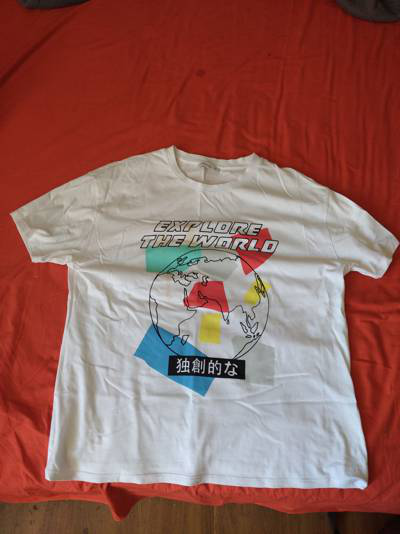

In [45]:
path = './clothing-dataset-small-master/train/t-shirt'
name = '00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

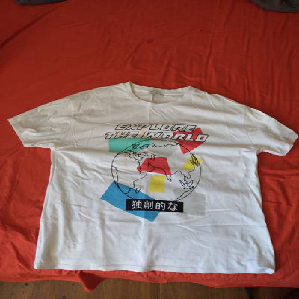

In [46]:
load_img(fullname, target_size=(299,299))

In [47]:
img = load_img(fullname, target_size=(299,299))

In [48]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1C4D937CA10>


In [49]:
np.array(img)

array([[[104,  20,  10],
        [105,  21,  11],
        [105,  21,  11],
        ...,
        [ 43,  35,  33],
        [ 42,  34,  32],
        [ 39,  31,  29]],

       [[105,  21,  11],
        [105,  21,  11],
        [106,  22,  12],
        ...,
        [ 41,  33,  31],
        [ 41,  33,  31],
        [ 40,  32,  30]],

       [[106,  22,  12],
        [106,  22,  12],
        [107,  23,  13],
        ...,
        [ 42,  34,  32],
        [ 41,  33,  31],
        [ 38,  30,  28]],

       ...,

       [[ 88,  67,  40],
        [ 92,  71,  44],
        [ 89,  68,  41],
        ...,
        [ 19,   7,   7],
        [ 19,   7,   7],
        [ 19,   7,   7]],

       [[ 88,  67,  40],
        [ 89,  68,  41],
        [ 85,  64,  37],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]],

       [[ 86,  65,  38],
        [ 91,  70,  43],
        [ 88,  67,  40],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]]

In [50]:
x = np.array(img)
x.shape
# channel are 3: (R,G,B) of size 150x150

(299, 299, 3)

# 8.3 Pre-trained convonlutional Neural Network
- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [52]:
model = Xception(weights='imagenet', input_shape=(299,299, 3))

In [53]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [54]:
X = preprocess_input(X)

In [55]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [56]:
pred.shape

(1, 1000)

In [57]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.88693106),
  ('n02730930', 'apron', 0.006279672),
  ('n04235860', 'sleeping_bag', 0.0059950743),
  ('n04456115', 'torch', 0.005802474),
  ('n03710637', 'maillot', 0.0057547386)]]

# 8.4 Convolutional Neural Networks
- Types of layers: Convolutional and Dense
- Convolutional layers and filters
- Dense layers

# 8.5 Transfer Learning
- Reading data with ImageDataGenerator
- Train Xception on smaller image (150x150)
- (Better to run with a GPU)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [61]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size = (150,150),
    batch_size = 32
)

Found 3068 images belonging to 10 classes.


In [62]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [63]:
X, y = next(train_ds)

In [64]:
X

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 0.00392163, -0.42745095, -0.5921569 ],
         [-0.15294117, -0.52156866, -0.6784314 ],
         [-0.2235294 , -0.5529412 , -0.7254902 ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 0.17647064, -0.3333333 , -0.5529412 ],
         [ 0.10588241, -0.35686272, -0.5921569 ],
         [ 0.04313731, -0.38823527, -0.62352943]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 0.27843142, -0.29411763, -0.5529412 ],
         [ 0.19215691, -0.32549018, -0.6       ],
         [ 0.16078436, -0.34117645, -0.62352943]],

        ...,

        [[ 0.3411765 , -0.20784312, -0

In [65]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [67]:
base_model = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3),
)

base_model.trainable = False

In [29]:
base_model = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3),
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base) 

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [30]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [31]:
preds[0]

array([-0.61854446,  0.11078683, -0.62622255, -0.1735352 ,  0.91571   ,
        0.03862989,  1.2860181 ,  0.21013097, -1.6563873 ,  0.32205003],
      dtype=float32)

In [33]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
 
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [34]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


C:\Users\amark\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 438s 4s/step - accuracy: 0.5743 - loss: 1.7364 - val_accuracy: 0.7771 - val_loss: 0.9062
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 469s 5s/step - accuracy: 0.8268 - loss: 0.6043 - val_accuracy: 0.7390 - val_loss: 0.9858
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 441s 5s/step - accuracy: 0.8833 - loss: 0.3370 - val_accuracy: 0.7683 - val_loss: 0.9671
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.9281 - loss: 0.1903 - val_accuracy: 0.7713 - val_loss: 1.0067
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.9468 - loss: 0.1370 - val_accuracy: 0.8006 - val_loss: 0.8089
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9668 - loss: 0.1016 - val_accuracy: 0.8211 - val_loss: 0.8565
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1346s 14s/step - accuracy: 0.9791 - loss: 0.0802 - val_accuracy: 0.7889 - val_loss: 1.0549
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.9926 - loss: 0.0415 - val_accuracy: 0.8094 - val_loss: 

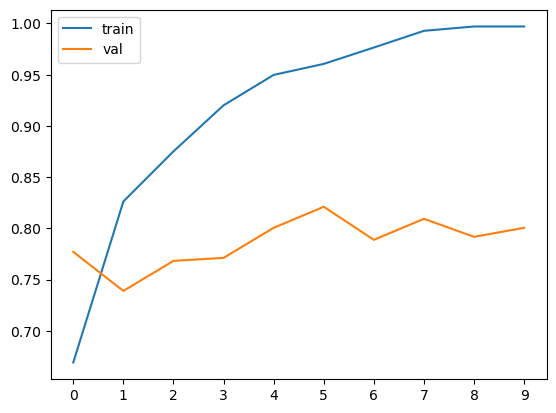

In [35]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# Adjusting the learning rate
- What's the laerning rate
- Trying different values

In [36]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (150, 150, 3),
    )
    base_model.trainable = False
    
    ################################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base) 
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
                 )
    return model

In [48]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.2109 - loss: 2.2274 - val_accuracy: 0.4751 - val_loss: 1.6712
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 348s 4s/step - accuracy: 0.5249 - loss: 1.4908 - val_accuracy: 0.5924 - val_loss: 1.2996
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.6155 - loss: 1.1922 - val_accuracy: 0.6686 - val_loss: 1.1046
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.6685 - loss: 1.0596 - val_accuracy: 0.6921 - val_loss: 0.9877
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.7116 - loss: 0.9250 - val_accuracy: 0.7155 - val_loss: 0.9127
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.7253 - loss: 0.8752 - val_accuracy: 0.7155 - val_loss: 0.8550
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7429 - loss: 0.8094 - val_accuracy: 0.7390 - val_loss: 0.8146
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.7647 - loss: 0.7550 - val_accuracy: 0.7

In [56]:
del scores[0.1]
del scores[0.0001]

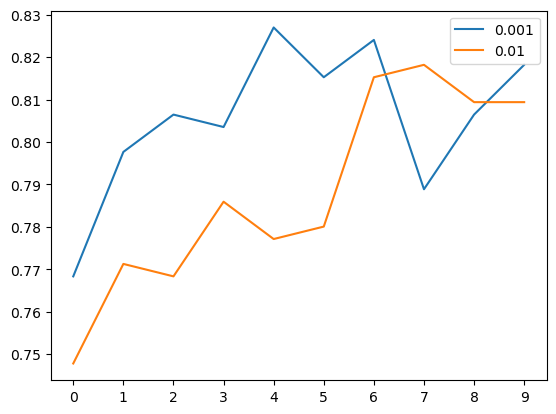

In [57]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

# 8.7 Checkpointing
- Saving the best model only
- Training a model with callbacks

In [63]:
model.save_weights('model_v1.weights.h5')

In [65]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [66]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)

history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint]
                   )

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.4963 - loss: 1.5128 - val_accuracy: 0.7713 - val_loss: 0.7154
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1906s 20s/step - accuracy: 0.7858 - loss: 0.6291 - val_accuracy: 0.7918 - val_loss: 0.6235
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.8471 - loss: 0.4791 - val_accuracy: 0.7889 - val_loss: 0.6122
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.8603 - loss: 0.4312 - val_accuracy: 0.7977 - val_loss: 0.6010
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.8893 - loss: 0.3765 - val_accuracy: 0.8211 - val_loss: 0.5499
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 419s 4s/step - accuracy: 0.9067 - loss: 0.3283 - val_accuracy: 0.8123 - val_loss: 0.5484
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 411s 4s/step - accuracy: 0.9255 - loss: 0.2779 - val_accuracy: 0.8211 - val_loss: 0.5379
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.9381 - loss: 0.2557 - val_accuracy: 0.8152 -

# 8.8 Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [38]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (150, 150, 3),
    )
    base_model.trainable = False
    
    ################################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
                 )
    return model

In [39]:
scores = {}
learning_rate = 0.001
for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22619s 238s/step - accuracy: 0.4548 - loss: 1.6616 - val_accuracy: 0.6833 - val_loss: 0.9967
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 354s 4s/step - accuracy: 0.7216 - loss: 0.8763 - val_accuracy: 0.7390 - val_loss: 0.8083
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.7832 - loss: 0.6862 - val_accuracy: 0.7625 - val_loss: 0.7121
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.8168 - loss: 0.5750 - val_accuracy: 0.7830 - val_loss: 0.6583
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.8436 - loss: 0.4889 - val_accuracy: 0.7918 - val_loss: 0.6076
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.8675 - loss: 0.4366 - val_accuracy: 0.8035 - val_loss: 0.6024
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1117s 3s/step - accuracy: 0.8900 - loss: 0.3846 - val_accuracy: 0.7977 - val_loss: 0.5773
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9005 - loss: 0.3498 - val_accuracy: 0.

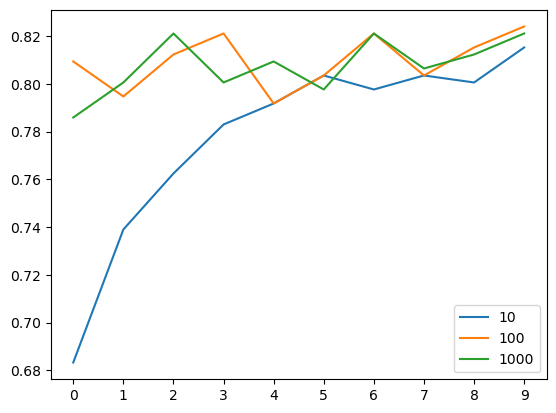

In [41]:
for size, score in scores.items():
    plt.plot(score['val_accuracy'], label=size)
plt.xticks(np.arange(10))
plt.legend()

# 8.9 Regularization and dropout
- Regularizing by freezing a part of the network
- adding dropout to our model
- Dropout: what if we randomly hide a part of input
- Experimenting with different values

In [32]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (150, 150, 3),
    )
    base_model.trainable = False
    
    ################################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
                 )
    return model

In [33]:
scores = {}
learning_rate = 0.001
size = 100

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30


C:\Users\amark\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.5760 - loss: 1.2423 - val_accuracy: 0.8035 - val_loss: 0.6451
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.8183 - loss: 0.5223 - val_accuracy: 0.7918 - val_loss: 0.5942
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.8848 - loss: 0.3342 - val_accuracy: 0.8035 - val_loss: 0.5945
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9290 - loss: 0.2284 - val_accuracy: 0.8123 - val_loss: 0.5765
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9568 - loss: 0.1641 - val_accuracy: 0.8035 - val_loss: 0.5990
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.9714 - loss: 0.1176 - val_accuracy: 0.8240 - val_loss: 0.6208
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9849 - loss: 0.0908 - val_accuracy: 0.8328 - val_loss: 0.5838
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9947 - loss: 0.0605 - val_accuracy: 0.8211 - val_loss: 0.

In [ ]:
del

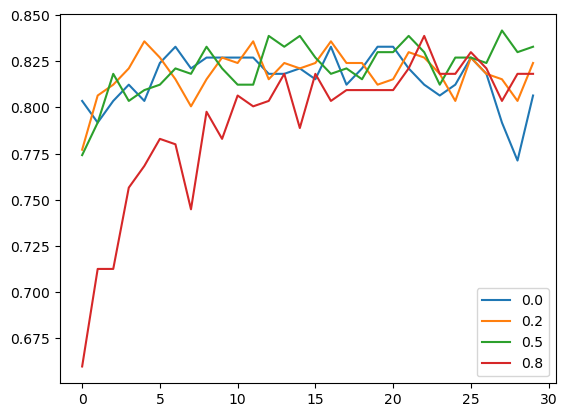

In [41]:
 for droprate, score in scores.items():
    plt.plot(score['val_accuracy'], label=droprate)
# plt.xticks(np.arange(30))
plt.legend()

# 8.10 Data Augmentation
- Training a model with augmentation
- How to select data augmentation

In [69]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size=(150,150),
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate,
)
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


C:\Users\amark\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.4783 - loss: 1.5739 - val_accuracy: 0.7713 - val_loss: 0.7656
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.7151 - loss: 0.8815 - val_accuracy: 0.7859 - val_loss: 0.6660
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.7235 - loss: 0.8113 - val_accuracy: 0.7889 - val_loss: 0.6593
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.7551 - loss: 0.6994 - val_accuracy: 0.7889 - val_loss: 0.6096
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.7835 - loss: 0.6321 - val_accuracy: 0.7918 - val_loss: 0.6499
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.7841 - loss: 0.6073 - val_accuracy: 0.8152 - val_loss: 0.5995
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.8326 - loss: 0.5022 - val_accuracy: 0.7801 - val_loss: 0.6316
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.8394 - loss: 0.4896 - val_accuracy: 0.7830 - val_loss: 0.

In [1]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights = 'imagenet',
        include_top = False,
        input_shape = (input_size, input_size, 3),
    )
    base_model.trainable = False
    
    ################################################
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy']
                 )
    return model

In [2]:
input_size = 299

In [10]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [11]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate,
)
history = model.fit(train_ds, epochs=50,
                    validation_data=val_ds,
                    callbacks=[checkpoint]
                   )

Epoch 1/50


C:\Users\amark\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 1664s 17s/step - accuracy: 0.5133 - loss: 1.4306 - val_accuracy: 0.8270 - val_loss: 0.5610
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1295s 13s/step - accuracy: 0.7716 - loss: 0.7033 - val_accuracy: 0.8299 - val_loss: 0.4718
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1182s 12s/step - accuracy: 0.8075 - loss: 0.5668 - val_accuracy: 0.8387 - val_loss: 0.4504
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1119s 12s/step - accuracy: 0.8286 - loss: 0.5265 - val_accuracy: 0.8504 - val_loss: 0.4425
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1127s 12s/step - accuracy: 0.8446 - loss: 0.4608 - val_accuracy: 0.8387 - val_loss: 0.4149
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 970s 10s/step - accuracy: 0.8510 - loss: 0.4476 - val_accuracy: 0.8504 - val_loss: 0.4334
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 954s 10s/step - accuracy: 0.8635 - loss: 0.4178 - val_accuracy: 0.8387 - val_loss: 0.4505
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 945s 10s/step - accuracy: 0.8643 - loss: 0.4133 - val_accuracy: 0.8622 -

# Using the Model
- Loading the model
- Evaluating the model
- Getting prediction

In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
model = keras.models.load_model('xception_v4_08_0.862.keras')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [3]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small-master/test',
    target_size=(299,299),
    batch_size=32,
    shuffle=False,
)

Found 372 images belonging to 10 classes.


In [5]:
model.evaluate(test_ds)

C:\Users\amark\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 151s 13s/step - accuracy: 0.8465 - loss: 0.3994


[0.29263174533843994, 0.897849440574646]

In [15]:
path = './clothing-dataset-small-master/train/pants'
name = '0ccc318a-7d69-4d7f-a442-aac1f88bc453.jpg'
fullname = f'{path}/{name}'

In [18]:
img = load_img(fullname, target_size=(299,299))

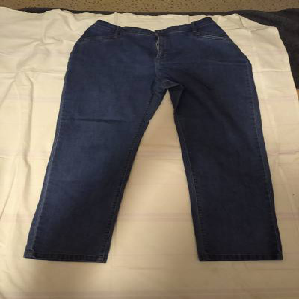

In [19]:
img

In [20]:
import numpy as np

In [22]:
x = np.array(img)

In [24]:
X = np.array([x])

In [26]:
X = preprocess_input(X)

In [39]:
pred = model.predict(X)
pred = pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


In [31]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [40]:
dict(zip(classes, pred))

{'dress': -3.5061777,
 'hat': -4.392847,
 'longsleeve': -0.5618359,
 'outwear': -2.1945074,
 'pants': 6.7874713,
 'shirt': -2.0848083,
 'shoes': -4.926296,
 'shorts': 3.500493,
 'skirt': -1.1799427,
 't-shirt': -3.3385534}